In [83]:
import requests

REST_API_KEY = '2fa4da0b370eee3234c565b78ecff325'
# url 의 ? 뒤쪽은 쿼리 파라미터
# keyword의 주변 반경 1km 내의 맛집 찾기
KEYWORD_LOCAL_URL = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}&radius=2000&page={}'

keywords=['강남역', '홍대입구역']

In [90]:
# header 에 인증 정보 추가 (안하면 401 error)
headers = {
    'Authorization' : f'KakaoAK {REST_API_KEY}'
}

all_responses = []

for keyword in keywords:
    for page in range(1, 45):
        url = KEYWORD_LOCAL_URL.format(keyword + ' 맛집', page)
        response = requests.get(url, headers=headers)
    
        if response.status_code == 200:
            all_responses.append(response.json())
        else:
            print(f"Error {response.status_code}: {response.json()}")

In [ ]:
all_responses[0]['documents']

In [91]:
# 가게 id 추출

ids = []
for response in all_responses:
    docs = response['documents']
    ids.extend([ d['id'] for d in docs ])

len(ids)

1320

## comment 수집하기

In [106]:
COMMENT_URL = "https://place.map.kakao.com/m/commentlist/v/8279464/0?order=USEFUL&onlyPhotoComment=false"
response = requests.get(COMMENT_URL)
len(response.json())

0

In [76]:
# 각 가게에 부여된 id와 마지막 comment id 를 넣을 수 있게 format 삽입

COMMENT_URL = "https://place.map.kakao.com/m/commentlist/v/{}/{}?order=USEFUL&onlyPhotoComment=false"

In [ ]:
all_comments = []
for id in ids[:3]:
    # 첫 번쨰 코멘트의 id는 무조건 0
    comment_id = 0

    # has_next가 true 면 마지막 코멘트 id를 새롭게 넣어 계속 크롤링
    has_next = True

    while has_next:
        SCRAP_COMMENT_URL = COMMENT_URL.format(id, comment_id)
        response = requests.get(SCRAP_COMMENT_URL)
        if len(response.json()) == 0:
            continue
        comment_data = response.json()['comment']

        comment_list = comment_data['list']
        all_comments.extend(comment_list)
        has_next = comment_data['hasNext']

        if has_next:
            comment_id = comment_list[-1]['commentid']

all_comments

In [80]:
len(all_comments)

872

In [81]:
import pandas as pd

comment_df = pd.DataFrame(all_comments)
comment_df_filtered = comment_df[['contents', 'point']]
comment_df_filtered

,contents,point
0,맛은있는데 너무 많아서 쌀국수랑 싸우는기분...,3
1,푸짐하게 먹을 수 있어요,4
2,예전의 감동은 없는 듯함.. 웨이팅할 정도의 맛은 아니지만 지나가다 생각나서 먹을정...,3
3,맛있고 또 맛있어요\n강추입니다,5
4,NaN,5
...,...,...
867,NaN,3
868,NaN,4
869,스시는 비싼 접시를 고르면 실패하지않음ㅋㅋㅋ 간판에 되게 싼것처럼 적어놔서 들어갔는...,3
870,NaN,3


<Axes: xlabel='point'>

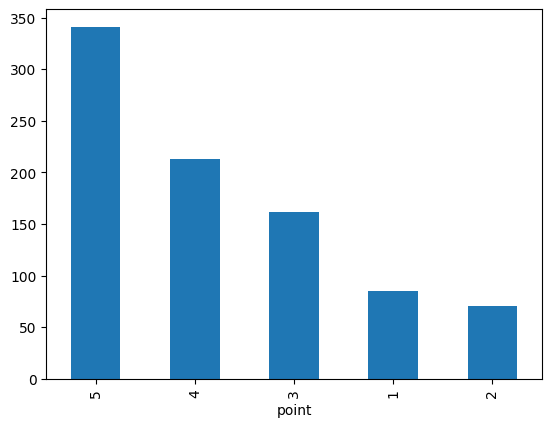

In [82]:
comment_df_filtered['point'].value_counts().plot(kind='bar')

In [ ]:
pip install openpyxl

In [ ]:
comment_df_filtered.to_excel('comments_seoul.xlsx', index=False)